# Food sales predictions (ML preprocessing)

**Author:** Gurtej Bains 

# Import Libraries

In [116]:
# Pandas
import pandas as pd
# Numpy
import numpy as np

# visualizations 
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Models
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Decision Tree 
from sklearn.tree import DecisionTreeRegressor

# Import the bagging regressor
from sklearn.ensemble import BaggingRegressor

# Import random forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

In [117]:
# Color class to make print look pretty  

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(color.BOLD + 'Hello, World!' + color.END)

Hello, World!


# User Defined Functions

In [118]:
# Function to eye ball the data
def overall_shape(table_name, sample_size=10):
  """
  This function takes a table and returns a detailed description of its shape.
  table_name: enter the dataframe name 
  sample_size: enter the sample size of the output to be viewed 
  """
  no_of_columns = table_name.shape[1]
  no_of_rows = table_name.shape[0]
  sample_data = table_name.sample(sample_size)
  print (f"{color.BOLD}Total number of columns in dataframe: {color.RED}{no_of_columns}{color.END}{color.END}")
  print (f"{color.BOLD}Total number of rows in dataframe: {color.RED}{no_of_rows}{color.END}{color.END}")
  print (f"{color.BOLD}Below is the sample of {color.RED}{sample_size} records {color.END}{color.END}")
  return sample_data 

In [119]:
# Function to eye ball duplicate rows  
def overall_dup(table_name):
  """
  This function takes a table and returns a duplicate rows info.
  table_name: enter the dataframe name 
  sample_size: enter the sample size of the output to be viewed 
  """
  # row level calculations here
  no_of_rows = table_name.shape[0]
  actual_row_dups = table_name.duplicated( ).sum() 
  actual_row_dups_per = (actual_row_dups/no_of_rows).round(4)
  total_effected = table_name.duplicated(keep=False).sum() 
  
  # Columsn calculations here 
  no_of_columns = table_name.shape[1]
  actual_col_dups = table_name.T.duplicated( ).sum()
  
  # print row level data here 
  print (f"{color.BOLD}Total number of rows in dataframe: {color.RED}{no_of_rows}{color.END}{color.END}")
  print (f"{color.BOLD}Total duplicate row values: {color.RED}{actual_row_dups} which is {actual_row_dups_per}% of total rows {color.END}{color.END}")
  print (f"{color.BOLD}Total duplicate rows: {color.RED}{total_effected}{color.END}{color.END}")
  print ("\n")
  
  # print column level data here 
  print (f"{color.BOLD}Total number of columns in dataframe: {color.RED}{no_of_columns}{color.END}{color.END}")
  print (f"{color.BOLD}Total duplicate columns: {color.RED}{actual_col_dups}{color.END}")
  return  

In [120]:
# functions to eye ball missing values 
def missing_values (dataframe):
    cols = int(dataframe.shape[1])
    stats_df = pd.DataFrame()
    for i in dataframe.columns:
        stats_df.loc[i, "Total Rows"] = int(dataframe[i].shape[0])
        stats_df.loc[i, "Total Unique Counts"] = int(dataframe[i].nunique(dropna=False))
        stats_df.loc[i, "Has Missing Values"] = (dataframe[i].isna().sum() > 0)
        stats_df.loc[i, "Missing Value Counts"] = int(dataframe[i].isna().sum())  
        stats_df.loc[i, "Missing Value Percentage"] = round(dataframe[i].isna().sum()/dataframe[i].shape[0],4)
        
    return stats_df.head(cols).sort_values(by='Missing Value Counts', ascending=False).style.format({'Total Rows': '{:.0f}',
                                                                                                    'Total Unique Counts': '{:.0f}',
                                                                                                    'Missing Value Counts': '{:.0f}',
                                                                                                    'Missing Value Percentage': '{0:.4f}%'})

In [121]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def model_metrics(pipe, x_train, y_train, x_test, y_test, 
                       model_name='Regression Model', ):
  # Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),4)
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),4)
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),4)
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

  # Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),4)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),4)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),4)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)

  # Display the metrics for the model
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae} \nMSE: {mse} \nRMSE: {rmse} \nR2: {r2}\n')

# Load and Inspect Data

## Load the data

In [122]:
df = pd.read_csv(r"C:\Users\gurte\OneDrive\All About Learning\Coding Dojo\Learning Material\02 Weekly Assignments\wk6 12-19 (ML wk2)\sales_predictions.csv")
print ("Import successful")

Import successful


## Inpect the data

In [123]:
# Display the random 10 rows of the dataframe
overall_shape (df)

Total number of columns in dataframe: 12
Total number of rows in dataframe: 8523
Below is the sample of 10 records 


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
967,FDT49,7.00,Low Fat,0.152262,Canned,105.7280,OUT017,2007,NaN,Tier 2,Supermarket Type1,1278.3360
6984,FDX04,NaN,Regular,0.041370,Frozen Foods,46.2376,OUT027,1985,Medium,Tier 3,Supermarket Type3,814.9392
3763,NCW53,18.35,Low Fat,0.030470,Health and Hygiene,191.3162,OUT013,1987,High,Tier 3,Supermarket Type1,1346.9134
6709,NCV05,NaN,Low Fat,0.030062,Health and Hygiene,154.3656,OUT027,1985,Medium,Tier 3,Supermarket Type3,2471.4496
8311,FDV55,17.75,Low Fat,0.055159,Fruits and Vegetables,145.6444,OUT049,1999,Medium,Tier 1,Supermarket Type1,2467.4548
4436,FDZ09,17.60,Low Fat,0.104879,Snack Foods,164.8868,OUT046,1997,Small,Tier 1,Supermarket Type1,2456.8020
6400,FDT43,16.35,Low Fat,0.034393,Fruits and Vegetables,50.8324,OUT010,1998,NaN,Tier 3,Grocery Store,155.7972
3594,DRC36,13.00,Regular,0.044985,Soft Drinks,175.0054,OUT046,1997,Small,Tier 1,Supermarket Type1,1926.1594
126,DRI49,14.15,Low Fat,0.183507,Soft Drinks,82.4276,OUT046,1997,Small,Tier 1,Supermarket Type1,1137.1864
5702,FDZ48,17.75,Low Fat,0.076389,Baking Goods,111.1544,OUT017,2007,NaN,Tier 2,Supermarket Type1,1118.5440


data load appears to be having no issues

In [124]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


there are some missing values which we will impute at a later stage

In [125]:
# Display the descriptive statistics for the numeric columns
df.describe(include="number") 

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [126]:
# Display the descriptive statistics for the numeric columns
df.describe(exclude="number") 

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


we might consider removing the column item identifier from the model as it will generate high cardianality

# Clean the data

## Address unnecesary columns

no columns need to be removed based on the requirements of this project

## Address unnesessary rows

### Duplicates

In [127]:
overall_dup (df)

Total number of rows in dataframe: 8523
Total duplicate row values: 0 which is 0.0% of total rows 
Total duplicate rows: 0


Total number of columns in dataframe: 12
Total duplicate columns: 0


There are no duplicates

### Bad data values: Numerical Data

In [128]:
# this will check for weird values
col_miss = ['Item_Weight']
for i_col in col_miss:
    for j in df[i_col].unique():
        try:
            str(j)
        except ValueError:
            print(f"{i_col}: {j}")
            
df['Item_Weight'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

NaN      1463
4.555       4
4.590       5
4.610       7
4.615       4
Name: Item_Weight, dtype: int64

No bad data in this column except missing values

In [129]:
# this will check for weird values
col_miss = ['Item_Visibility']
for i_col in col_miss:
    for j in df[i_col].unique():
        try:
            str(j)
        except ValueError:
            print(f"{i_col}: {j}")

df['Item_Visibility'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

0.000000    526
0.003575      1
0.003589      1
0.003598      1
0.003599      1
Name: Item_Visibility, dtype: int64

No bad data in this column

In [130]:
# trimming the decimal places to 3 digits
df['Item_Visibility'] = round (df['Item_Visibility'],3)
df['Item_Visibility'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

0.000    526
0.004      6
0.005     11
0.006     34
0.007     40
Name: Item_Visibility, dtype: int64

In [131]:
# this will check for weird values
col_miss = ['Item_MRP']
for i_col in col_miss:
    for j in df[i_col].unique():
        try:
            str(j)
        except ValueError:
            print(f"{i_col}: {j}")
            
df['Item_MRP'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

31.2900    1
31.4900    1
31.8900    1
31.9558    2
32.0558    1
Name: Item_MRP, dtype: int64

No bad data in this column

In [132]:
# trimming the decimal places to 3 digits
df['Item_MRP'] = round (df['Item_MRP'],3)
df['Item_MRP'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

31.290    1
31.490    1
31.890    1
31.956    2
32.056    1
Name: Item_MRP, dtype: int64

In [133]:
# this will check for weird values
col_miss = ['Outlet_Establishment_Year']
for i_col in col_miss:
    for j in df[i_col].unique():
        try:
            str(j)
        except ValueError:
            print(f"{i_col}: {j}")
            
df['Outlet_Establishment_Year'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

1985    1463
1987     932
1997     930
1998     555
1999     930
Name: Outlet_Establishment_Year, dtype: int64

No bad data in this column

In [134]:
# this will check for weird values
col_miss = ['Item_Outlet_Sales']
for i_col in col_miss:
    for j in df[i_col].unique():
        try:
            str(j)
        except ValueError:
            print(f"{i_col}: {j}")

df['Item_Outlet_Sales'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

33.2900    2
33.9558    1
34.6216    1
35.2874    1
36.6190    2
Name: Item_Outlet_Sales, dtype: int64

No bad data in this column

In [135]:
# trimming the decimal places to 3 digits
df['Item_Outlet_Sales'] = round (df['Item_Outlet_Sales'],3)
df['Item_Outlet_Sales'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

33.290    2
33.956    1
34.622    1
35.287    1
36.619    2
Name: Item_Outlet_Sales, dtype: int64

### Bad data values: Categorical Data

In [136]:
# this will help see all the values 
df['Item_Identifier'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

DRA12    6
DRA24    7
DRA59    8
DRB01    3
DRB13    5
DRB24    4
DRB25    6
DRB48    7
DRC01    6
DRC12    4
Name: Item_Identifier, dtype: int64

In [137]:
df['Item_Identifier'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').tail(10)

NCZ05    3
NCZ06    7
NCZ17    6
NCZ18    7
NCZ29    4
NCZ30    7
NCZ41    5
NCZ42    5
NCZ53    5
NCZ54    7
Name: Item_Identifier, dtype: int64

No bad data in this column 

In [138]:
# this will help see all the values 
df['Item_Fat_Content'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

Some bad values need to be addressed

In [139]:
# fixing bad values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'])
df['Item_Fat_Content'].value_counts(dropna=False, ascending=True)

Regular    3006
Low Fat    5517
Name: Item_Fat_Content, dtype: int64

In [140]:
# QA
df['Item_Fat_Content'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [141]:
# this will help see all the values 
df['Item_Type'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Name: Item_Type, dtype: int64

No bad data in this column

In [142]:
# this will help see all the values 
df['Outlet_Identifier'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Outlet_Identifier, dtype: int64

No bad data in this column

In [143]:
# this will help see all the values 
df['Outlet_Size'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

NaN       2410
High       932
Medium    2793
Small     2388
Name: Outlet_Size, dtype: int64

There are 2410 missing values in this column 

In [144]:
# this will help see all the values 
df['Outlet_Location_Type'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

No bad data in this column 

In [145]:
# this will help see all the values 
df['Outlet_Type'].value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(10)

Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

No bad data in this column 

# Identify Missing Values

In [146]:
# checking missing values with user defined function
missing_values (df)

,Total Rows,Total Unique Counts,Has Missing Values,Missing Value Counts,Missing Value Percentage
Outlet_Size,8523,4,True,2410,0.2828%
Item_Weight,8523,416,True,1463,0.1717%
Item_Identifier,8523,1559,False,0,0.0000%
Item_Fat_Content,8523,2,False,0,0.0000%
Item_Visibility,8523,274,False,0,0.0000%
Item_Type,8523,16,False,0,0.0000%
Item_MRP,8523,5938,False,0,0.0000%
Outlet_Identifier,8523,10,False,0,0.0000%
Outlet_Establishment_Year,8523,9,False,0,0.0000%
Outlet_Location_Type,8523,3,False,0,0.0000%


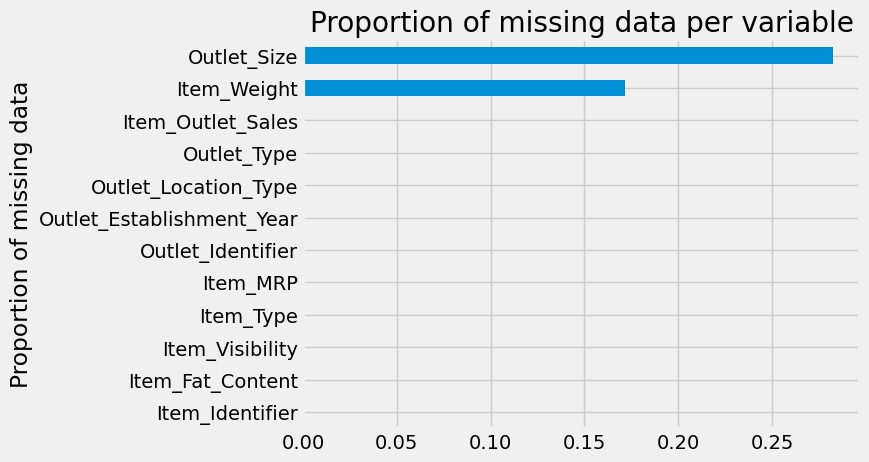

In [147]:
with plt.style.context("fivethirtyeight"):
    df.isnull().mean().sort_values(ascending=True).plot.barh()
    plt.ylabel("Proportion of missing data")
    plt.title("Proportion of missing data per variable")
    plt.show()

Outlet Size has 2410 missing values which is ~28% of the data <br>
Item Weight has 1463 missing values which is ~17% of the data

# Ordinal Encoding with non missing values

In [148]:
df['Item_Fat_Content'].replace({'Low Fat':0, 'Regular':1}, inplace=True)
df['Item_Fat_Content'].value_counts().sort_index().head()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [149]:
df['Outlet_Location_Type'].replace({'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)
df['Outlet_Location_Type'].value_counts().sort_index().head()

0    2388
1    2785
2    3350
Name: Outlet_Location_Type, dtype: int64

# Validation Split

In [150]:
# Split feature and target 
X = df.drop(['Item_Outlet_Sales', 'Item_Identifier'], axis = 1).copy()
y = df['Item_Outlet_Sales']

# QA the split
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016,Dairy,249.809,OUT049,1999,Medium,0,Supermarket Type1
1,5.92,1,0.019,Soft Drinks,48.269,OUT018,2009,Medium,2,Supermarket Type2
2,17.50,0,0.017,Meat,141.618,OUT049,1999,Medium,0,Supermarket Type1
3,19.20,1,0.000,Fruits and Vegetables,182.095,OUT010,1998,NaN,2,Grocery Store
4,8.93,0,0.000,Household,53.861,OUT013,1987,High,2,Supermarket Type1


In [151]:
#Validation Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Prepare the data

## Column Selector 

In [152]:
# Instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [153]:
# QA
num_selector(X_train)

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Outlet_Location_Type']

## Impute Missing Values

In [154]:
# Imputers for missing values 
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

In [155]:
# checking the values of numeric columns with missing values 
test1 = pd.DataFrame(mean_imputer.fit_transform(df[['Item_Weight']]))
test1.value_counts(dropna=False).sort_index(ascending=True, na_position='first').head(15)

4.555    4
4.590    5
4.610    7
4.615    4
4.635    5
4.785    5
4.805    4
4.880    5
4.905    2
4.920    5
5.000    3
5.030    4
5.035    4
5.095    5
5.110    5
dtype: int64

missing value fixed

In [156]:
# checking the values of categorical columns with missing values 
test2 = pd.DataFrame(freq_imputer.fit_transform(df[['Outlet_Size']]))
test2.value_counts(dropna=False).sort_index(ascending=True, na_position='first').head()

High       932
Medium    5203
Small     2388
dtype: int64

missing value fixed

## Transformers

In [157]:
# Instantiate the transformers
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

## Instantiate Pipeline

In [158]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [159]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

## Tuples

In [160]:
# Create tuples
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

## Column Transformer

In [161]:
# Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x00000202430FA280>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000002024379DF40>)])

# Model the data 

## Linear Regression Model 

In [162]:
# Create an instance of the model
lin_reg = LinearRegression()

# Create a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)

# Fit the model
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000202430FA280>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002024379DF40>)])),
                ('linearregression', LinearRegression())])

In [163]:
# Make predictions using the training and testing data
training_predictions = lin_reg_pipe.predict(X_train)
test_predictions = lin_reg_pipe.predict(X_test)

In [164]:
# Display the Model's metrics
model_metrics(lin_reg_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Linear Regression Model')

Linear Regression Model Train Scores
MAE: 847.1281 
MSE: 1297556.9999 
RMSE: 1139.1036 
R2: 0.5615555

Linear Regression Model Test Scores
MAE: 804.1234 
MSE: 1194352.8187 
RMSE: 1092.8645 
R2: 0.5671031



All error rates are hight and r^2 is not very impressive. However, the model is has relatively high bias as the error rate is low. Model does exhibit low variability as r^2 of both test and train are not far apart

# Decision Tree Regression

In [165]:
# So you get the same results, let's set our random_state to the same number
dec_tree = DecisionTreeRegressor(max_depth = None, random_state = 42)

# Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)

# fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000202430FA280>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002024379DF40>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [166]:
# Display the Model's metrics
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Decision Tree Model')

Decision Tree Model Train Scores
MAE: 0.0 
MSE: 0.0 
RMSE: 0.0 
R2: 1.0

Decision Tree Model Test Scores
MAE: 1048.9952 
MSE: 2346807.8429 
RMSE: 1531.9295 
R2: 0.1493921



Results don't look promising as the test r^2 is too low. There is a huge variance in the result and the model is doing a terrible job in fitting with the test segment. Also MAE, MSE and RMSE for train is zero. 

In [167]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [168]:
# Obtain the max_depth from the pipeline and assign it to the variable max_depth
max_depth = dec_tree_pipe['decisiontreeregressor'].get_depth()
# Display max_depth
max_depth

40

In [169]:
# Create a range of max_depth values to evaluate
depths = range(1, max_depth+1)

# Create a dataframe to store Train and Test  R2 scores
scores = pd.DataFrame(columns=['Train Score', 'Test Score'], index=depths)

# Loop through the max_depth values
for depth in depths:
  # Create an instance of the model
  dec_tree = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  # Create a model pipeline
  dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
  # Fit the model
  dec_tree_pipe.fit(X_train, y_train)

  # Obtain the predictions from the model
  train_pred = dec_tree_pipe.predict(X_train)
  test_pred = dec_tree_pipe.predict(X_test)

  # Obtain the R2 scores for Train and Test
  train_r2score = r2_score(y_train, train_pred)
  test_r2score = r2_score(y_test, test_pred)

  # Save the Train and Test R2 Score for this depth in the scores dataframe
  scores.loc[depth, 'Train Score'] = train_r2score
  scores.loc[depth, 'Test Score'] = test_r2score

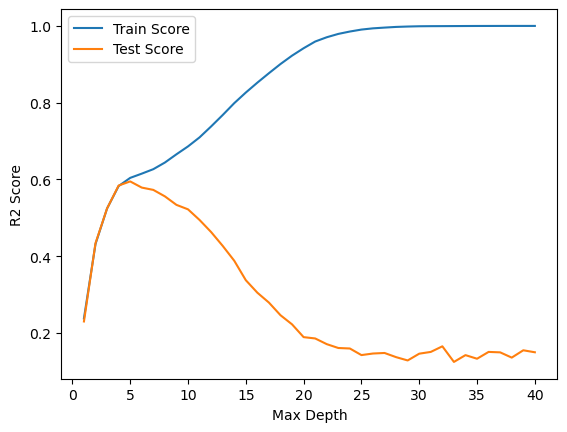

In [170]:
# Visualize the max_depths to display which achieves the highest R2 score
plt.plot(depths, scores['Train Score'], label='Train Score')
plt.plot(depths, scores['Test Score'], label='Test Score')
plt.ylabel('R2 Score')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [171]:
# Create a version on the scores dataframe
# sorted by highest Test Scores
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
# Display the first (5) rows of the dataframe
sorted_scores.head()

,Train Score,Test Score
5,0.60394,0.59471
4,0.582625,0.584005
6,0.614968,0.578633
7,0.62664,0.572624
8,0.643915,0.55577


In [172]:
#sort the dataframe by test scores and save the index (k) of the best score
best_depth = sorted_scores.index[0]
best_depth

5

In [173]:
# Create an instance of the model
dec_tree = DecisionTreeRegressor(max_depth=best_depth, random_state = 42)
# Create a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000202430FA280>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000002024379DF40>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [174]:
# Display the list of available hyperparameters for tuning
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [175]:
# Display the Model's metrics
model_metrics(dec_tree_pipe, x_train=X_train, y_train=y_train, 
                          x_test=X_test, y_test=y_test, 
                           model_name='Tuned Decision Tree Model')

Tuned Decision Tree Model Train Scores
MAE: 762.6102 
MSE: 1172122.777 
RMSE: 1082.6462 
R2: 0.6039397

Tuned Decision Tree Model Test Scores
MAE: 738.3173 
MSE: 1118185.9815 
RMSE: 1057.4431 
R2: 0.59471



Results look very promising. There is less bias and less variance in the results. This is a good model. 

# Recomendation: 

The Tuned Decision Tree Model is the best model. It is stable as does not have high bias or high varaince. MAE and RMSE is also good as sales predictions are off by approximatly Rs. 1,000